In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model 
from sklearn.datasets import make_regression 

# generate some synthetic dataset
x, y = make_regression(n_samples=30, n_features=1, noise=30, random_state=1) # generate data using the imported "make_regression" function
y    = y + 10*np.ones(30).reshape(y.shape) # add a 10* identity matrix to data
x    = x + 10*np.ones(30).reshape(x.shape) # add a 10* identity matrix to data
y    = y.reshape(-1,1)

# create Linear Regression model 
reg = linear_model.LinearRegression(fit_intercept=False) 
# fit a linear regression model 
reg = reg.fit(x,y) 

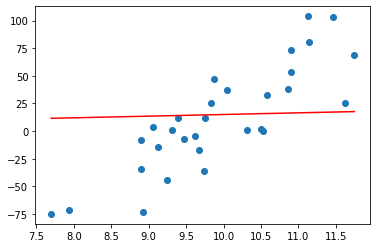

In [6]:
# choose random initial weight value w
w = np.array([-10])

lrate = 0.001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(x)) # Number of elements in X

MSE    = []
Ws     = [w]
y_pred = []
MSEw  = []
Grads  = [np.array([0])]

# Performing Gradient Descent 
for i in range(epochs): 
    y_hat    = w*x  # The current predicted value of Y 
    mse      = sum((y - y_hat)**2)/n # MSE Loss function
    mse_w    = (-2/n) * sum(x * (y - y_hat))  # Derivative of MSE Loss function wrt w
    gradient = lrate* mse_w
    w        = w - gradient  # Update weight
    
    y_pred.append(y_hat)
    MSE.append(mse) 
    MSEw.append(mse_w)
    Grads.append(gradient)
    Ws.append(w)

plt.scatter(x, y) 
x_coord = [x.min(), x.max()]
y_coord = [y_hat[np.argmin(x)], y_hat[np.argmax(x)]]
plt.plot(x_coord, y_coord, color='red')  # regression line
plt.show()

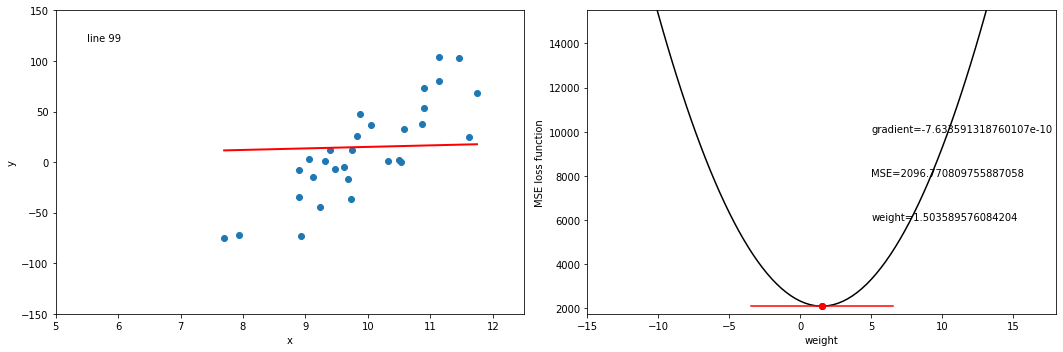

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# coordinates for plotting linear predictors with different weight
x_coord = [x.min(), x.max()]
y_coord = []
for el in y_pred:
    y_coord.append([el[np.argmin(x)], el[np.argmax(x)]])  

# coeff from build-in regression model
idealw = reg.coef_
idealMSE = sum((y - idealw*x)**2)/n   
    
# tangent line (derivative of MSE function) at the chosen weight value    
def tgline(x,y,slope):
    tgxrange = np.array([x-5, x+5])
    tgline   = slope*(tgxrange - x) + y      
    return tgline

# data for plotting MSE function
weight    = np.linspace(-15,18,100)
loss_func = np.zeros((100,1))
for i, w in enumerate(weight):
    loss_func[i][0] = sum((y - w*x)**2)/n
    
# First set up the figure, the axis, and the plot element we want to animate
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

ax1.scatter(x, y) # plot data points
ax1.set_xlim(5, 12.5)
ax1.set_ylim(-150, 150)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
text1  = ax1.text(5.5, 120, 'line 0')
line1, = ax1.plot(x_coord, y_coord[0], 'r-', linewidth=2) # plot linear predictor function

ax2.plot(weight,loss_func, c='k') # plot MSE loss function
ax2.set_xlim(-15, 18)
ax2.set_ylim(1750, 15500)
ax2.set_xlabel('weight')
ax2.set_ylabel('MSE loss function')
text21  = ax2.text(5, 6000, 'weight={:.15f}'.format(Ws[0][0]))
text22  = ax2.text(5, 8000, 'MSE={:.15f}'.format(MSE[0][0]))
text23  = ax2.text(5, 10000, 'gradient={}'.format(Grads[0][0]))
line2,  = ax2.plot([Ws[0]-5, Ws[0]+5], tgline(Ws[0], MSE[0], MSEw[0]), c='r') # plot tg line
point1, = ax2.plot(idealw, idealMSE, marker='o', c='b')
point2, = ax2.plot(Ws[0], MSE[0], marker='o', c='r')                          # and MSE at chosen weight

plt.tight_layout()

# initialization function: plot the background of each frame
def init():
    line1.set_data([], [])
    text1.set_text('')
    
    line2.set_data([], [])
    text21.set_text('')
    text22.set_text('')
    
    return line1, line2,

# animation function.  This is called sequentially
def animate(i):    
    line1.set_data(x_coord, y_coord[i])
    text1.set_text('line '+ str(i))
 
    line2.set_data([Ws[i]-5, Ws[i]+5], tgline(Ws[i], MSE[i], MSEw[i]))
    point2.set_data(Ws[i], MSE[i])
    text21.set_text('weight={:.15f}'.format(Ws[i][0]))
    text22.set_text('MSE={:.15f}'.format(MSE[i][0]))
    text23.set_text('gradient={}'.format(Grads[i][0]))
    
    return line1, text1, line2, text21, text22, text23

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

# save the animation as an mp4.  
anim.save('MSE_gradDesc_noInt.mp4', fps=10)

plt.show()